# Analysis of Urban Mobility & Economic Productivity in LATAM 🚗💸

## 1. Project Overview
This project investigates the relationship between **traffic congestion** and **economic indicators** (GDP per capita, unemployment) in major Latin American cities.

The goal is to determine if higher economic productivity correlates with increased traffic congestion and to identify cities where infrastructure investment is most critical.

## 2. Data Sources
The analysis integrates two distinct real-world datasets:
* **TomTom Traffic Index:** Real-time metrics on congestion levels, travel times, and delay overheads.
* **OECD Regional Economy:** Macroeconomic indicators including GDP, population density, and unemployment rates.

## 3. Methodology
Using **Python** and the **Pandas** library, the workflow consists of:
1.  **Data Cleaning:** Standardization of city/country names and handling missing values.
2.  **Data Integration:** Merging heterogeneous datasets based on geographical keys.
3.  **Exploratory Data Analysis (EDA):** Visualizing correlations between mobility efficiency and economic output.

## 1. Data Loading & Exploration
In this section, we initialize the environment by importing the necessary Python libraries for data manipulation (`pandas`) and visualization (`matplotlib`, `seaborn`).

We then load the two primary raw datasets:
* `tomtom_traffic.csv`: Contains real-time congestion metrics.
* `oecd_city_economy.csv`: Contains socio-economic indicators.

**Objective:**
To perform a preliminary inspection of the data structure using methods like `.info()` and `.head()`, allowing us to identify variable types and check for potential data quality issues such as missing values.


In [ ]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# upload files
traffic = pd.read_csv('/datasets/tomtom_traffic.csv')
eco = pd.read_csv('/datasets/oecd_city_economy.csv') #completa el código

In [ ]:
# showing first 5 traffic rows
traffic.head()

,Country,City,UpdateTimeUTC,JamsDelay,TrafficIndexLive,JamsLengthInKms,JamsCount,TrafficIndexWeekAgo,UpdateTimeUTCWeekAgo,TravelTimeLivePer10KmsMins,TravelTimeHistoricPer10KmsMins,MinsDelay
0,ARE,abu-dhabi,2025-01-13 04:01:30.001,650.7,36.0,109.1,162.0,30.0,2025-01-06 04:01:30.000,11.614767,10.265330,1.349437
1,ARE,abu-dhabi,2025-01-13 03:46:00.000,540.4,30.0,101.4,136.0,27.0,2025-01-06 03:46:30.001,11.003180,10.031544,0.971635
2,ARE,abu-dhabi,2025-01-13 02:46:30.000,71.8,7.0,18.9,23.0,6.0,2025-01-06 02:46:30.000,8.196278,8.196510,-0.000232
3,ARE,abu-dhabi,2025-01-13 01:46:30.001,8.2,2.0,4.1,2.0,2.0,2025-01-06 01:46:30.000,7.723808,7.899046,-0.175238
4,ARE,abu-dhabi,2025-01-13 00:01:30.000,1.1,1.0,0.2,1.0,1.0,2025-01-06 00:01:30.000,8.336363,8.604379,-0.268016


In [ ]:
# showing first 5 eco rows
eco.head()

,Year,City,Country,City GDP/capita,Unemployment %,PM2.5 (μg/m³),Population (M)
0,2023,buenos-aires,Argentina,"15.782,00",6.2%,"15,2","15,30"
1,2023,sao-paulo,Brazil,"14.475,00",9.1%,"29,50","22,50"
2,2023,rio-de-janeiro,Brazil,"13.142,00",9.8%,"19,10","13,60"
3,2023,brasilia,Brazil,"15.999,00",8.3%,"13,50","4,70"
4,2023,salvador,Brazil,"8.761,00",13.1%,"16,00","3,90"


## 2. Data Cleaning & Transformation
In this stage, we process the raw data to ensure consistency before merging. Since the datasets originate from different sources, we must harmonize naming conventions and granularity.

**Key Steps:**
1.  **Standardization:** Convert `City` and `Country` names to lowercase to prevent mismatches during the join process (e.g., ensuring "Mexico City" matches "mexico city").
2.  **Temporal Filtering:** Extract the `Year` from the timestamp column and filter the dataset to retain only records from **2024**.
3.  **Aggregation:** Since the traffic data contains multiple snapshots per city, we group these records by `City` and `Year` to calculate the **mean** values, resulting in a single, consolidated row per city.


In [ ]:
# Examine traffic structure
traffic.info()
traffic.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004464 entries, 0 to 1004463
Data columns (total 12 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   Country                         1004464 non-null  object 
 1   City                            1004464 non-null  object 
 2   UpdateTimeUTC                   1004464 non-null  object 
 3   JamsDelay                       1004464 non-null  float64
 4   TrafficIndexLive                1004464 non-null  float64
 5   JamsLengthInKms                 1004464 non-null  float64
 6   JamsCount                       1004464 non-null  float64
 7   TrafficIndexWeekAgo             1004464 non-null  float64
 8   UpdateTimeUTCWeekAgo            1004464 non-null  object 
 9   TravelTimeLivePer10KmsMins      1004464 non-null  float64
 10  TravelTimeHistoricPer10KmsMins  1004464 non-null  float64
 11  MinsDelay                       1004464 non-null  float64
dtype

,Country,City,UpdateTimeUTC,JamsDelay,TrafficIndexLive,JamsLengthInKms,JamsCount,TrafficIndexWeekAgo,UpdateTimeUTCWeekAgo,TravelTimeLivePer10KmsMins,TravelTimeHistoricPer10KmsMins,MinsDelay
0,ARE,abu-dhabi,2025-01-13 04:01:30.001,650.7,36.0,109.1,162.0,30.0,2025-01-06 04:01:30.000,11.614767,10.265330,1.349437
1,ARE,abu-dhabi,2025-01-13 03:46:00.000,540.4,30.0,101.4,136.0,27.0,2025-01-06 03:46:30.001,11.003180,10.031544,0.971635
2,ARE,abu-dhabi,2025-01-13 02:46:30.000,71.8,7.0,18.9,23.0,6.0,2025-01-06 02:46:30.000,8.196278,8.196510,-0.000232


**Observations on `traffic` DataFrame structure:**
* The `UpdateTimeUTC` columns are currently of type `object` and must be converted to `datetime`.
* The `JamsCount` column is `float64` and requires casting to `integer`.
* No missing values were detected.

In [ ]:
# Examine eco structure
eco.info()
eco.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Year             30 non-null     int64 
 1   City             30 non-null     object
 2   Country          30 non-null     object
 3   City GDP/capita  30 non-null     object
 4   Unemployment %   30 non-null     object
 5   PM2.5 (μg/m³)    30 non-null     object
 6   Population (M)   30 non-null     object
dtypes: int64(1), object(6)
memory usage: 1.8+ KB


,Year,City,Country,City GDP/capita,Unemployment %,PM2.5 (μg/m³),Population (M)
0,2023,buenos-aires,Argentina,"15.782,00",6.2%,"15,2","15,30"
1,2023,sao-paulo,Brazil,"14.475,00",9.1%,"29,50","22,50"
2,2023,rio-de-janeiro,Brazil,"13.142,00",9.8%,"19,10","13,60"


**Observations on `economy` DataFrame structure:**
* The columns `City GDP/capita`, `Unemployment %`, `PM2.5 (μg/m³)`, and `Population` are currently of type `object` and require conversion to `float` for numerical analysis.
* No missing values were detected.

### 2.2 Column Renaming
**Objective:**
Standardize column names to `snake_case` format to ensure consistency across datasets and facilitate the subsequent join operation.

**Modifications:**
* `Country` $\to$ `country`
* `UpdateTimeUTC` $\to$ `update_time_utc`


In [ ]:
# standarize traffic columns name
traffic.columns = ['country','city','update_time_utc','jams_delay','traffic_index_live','jams_length_in_kms','jams_count','traffic_index_week_ago','update_time_utc_week_ago','travel_time_live_per_10_kms_mins','travel_time_historic_per_10_kms_mins','mins_delay']
# verify changes
traffic.columns

Index(['country', 'city', 'update_time_utc', 'jams_delay',
       'traffic_index_live', 'jams_length_in_kms', 'jams_count',
       'traffic_index_week_ago', 'update_time_utc_week_ago',
       'travel_time_live_per_10_kms_mins',
       'travel_time_historic_per_10_kms_mins', 'mins_delay'],
      dtype='object')

In [ ]:
# standarize eco columns name
eco.columns = ['year','city','country','city_gdp_capita','unemployment_pct','pm_25','population_m']
# verify changes
eco.columns

Index(['year', 'city', 'country', 'city_gdp_capita', 'unemployment_pct',
       'pm_25', 'population_m'],
      dtype='object')


### 2.3 Data Type Conversion & Formatting

**Objective:**
Ensure that date and numeric columns are correctly formatted to enable accurate analysis, calculations, and comparisons.

**Modifications performed:**

1.  **Traffic Dataset (`traffic`):**
    * Converted date columns to `datetime` format, implementing error handling to ensure data integrity.

2.  **Economy Dataset (`eco`):**
    * **`city_gdp_capita`:** Removed thousand separators and normalized decimal commas to dots before casting to `float`.
    * **`unemployment_pct`:** Stripped the percentage symbol (`%`) and normalized decimal separators before casting to `float`.
    * **`population_m`:** Normalized decimal separators and converted to `float`.
    * **Feature Engineering:** Created a new `population` column by multiplying `population_m` by 1,000,000 to represent the absolute population count.

In [ ]:
# traffic columns convertion to date type with pd.to_datetime()
traffic['update_time_utc'] = pd.to_datetime(traffic['update_time_utc'],errors='coerce')
traffic['update_time_utc_week_ago'] = pd.to_datetime(traffic['update_time_utc_week_ago'],errors='coerce')

# change verification
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004464 entries, 0 to 1004463
Data columns (total 12 columns):
 #   Column                                Non-Null Count    Dtype         
---  ------                                --------------    -----         
 0   country                               1004464 non-null  object        
 1   city                                  1004464 non-null  object        
 2   update_time_utc                       1004464 non-null  datetime64[ns]
 3   jams_delay                            1004464 non-null  float64       
 4   traffic_index_live                    1004464 non-null  float64       
 5   jams_length_in_kms                    1004464 non-null  float64       
 6   jams_count                            1004464 non-null  float64       
 7   traffic_index_week_ago                1004464 non-null  float64       
 8   update_time_utc_week_ago              1004464 non-null  datetime64[ns]
 9   travel_time_live_per_10_kms_mins      1004464 

In [ ]:
# Clean separators and cast numeric columns in `eco` DataFrame
eco['city_gdp_capita'] = eco['city_gdp_capita'].astype(str).str.replace('.','').str.replace(',','.').astype(float)
eco['unemployment_pct'] = eco['unemployment_pct'].astype(str).str.replace('%','').str.replace(',','.').astype(float)
eco['population_m'] = eco['population_m'].astype(str).str.replace(',','.').astype(float)
# total population in abslute units calculation (Muliplied * 1000000)
eco['population'] = eco['population_m']*1000000

# change verification
eco.info()
eco.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              30 non-null     int64  
 1   city              30 non-null     object 
 2   country           30 non-null     object 
 3   city_gdp_capita   30 non-null     float64
 4   unemployment_pct  30 non-null     float64
 5   pm_25             30 non-null     object 
 6   population_m      30 non-null     float64
 7   population        30 non-null     float64
dtypes: float64(4), int64(1), object(3)
memory usage: 2.0+ KB


,year,city,country,city_gdp_capita,unemployment_pct,pm_25,population_m,population
0,2023,buenos-aires,Argentina,15782.0,6.2,"15,2",15.3,15300000.0
1,2023,sao-paulo,Brazil,14475.0,9.1,"29,50",22.5,22500000.0
2,2023,rio-de-janeiro,Brazil,13142.0,9.8,"19,10",13.6,13600000.0


## Step 3: Temporal Extraction & Filtering
Extracting the temporal component allows us to focus the analysis on the most recent and relevant period.

### 3.1 Extract year and filter for 2024
**Objective:**
Isolate records corresponding to the fiscal year 2024 for both datasets.

**Methodology:**
1.  **Feature Extraction:** Derived a new `year` column from the `traffic` timestamp using the `.dt.year` accessor.
2.  **Filtering:** Restricted the dataset to records where `year == 2024`.
3.  **Data Safety:** Created independent copies (`traffic_2024` and `eco_2024`) using `.copy()` to prevent `SettingWithCopyWarning` and preserve the integrity of the original datasets.

In [ ]:
# year extraction in update_time_utc
traffic['year'] = traffic['update_time_utc'].dt.year

# change verification
traffic.head(3)

,country,city,update_time_utc,jams_delay,traffic_index_live,jams_length_in_kms,jams_count,traffic_index_week_ago,update_time_utc_week_ago,travel_time_live_per_10_kms_mins,travel_time_historic_per_10_kms_mins,mins_delay,year
0,ARE,abu-dhabi,2025-01-13 04:01:30.001,650.7,36.0,109.1,162.0,30.0,2025-01-06 04:01:30.000,11.614767,10.265330,1.349437,2025
1,ARE,abu-dhabi,2025-01-13 03:46:00.000,540.4,30.0,101.4,136.0,27.0,2025-01-06 03:46:30.001,11.003180,10.031544,0.971635,2025
2,ARE,abu-dhabi,2025-01-13 02:46:30.000,71.8,7.0,18.9,23.0,6.0,2025-01-06 02:46:30.000,8.196278,8.196510,-0.000232,2025


In [ ]:
# 2024 filter
traffic_2024 = traffic[traffic['year']== 2024].copy()
eco_2024 = eco[eco['year']== 2024].copy()

# new DF validation
display(traffic_2024.head())
display(eco_2024.head())

,country,city,update_time_utc,jams_delay,traffic_index_live,jams_length_in_kms,jams_count,traffic_index_week_ago,update_time_utc_week_ago,travel_time_live_per_10_kms_mins,travel_time_historic_per_10_kms_mins,mins_delay,year
302,ARE,abu-dhabi,2024-12-31 23:01:30.000,12.9,5.0,2.5,5.0,2.0,2024-12-24 23:01:30.001,8.560399,8.519634,0.040765,2024
303,ARE,abu-dhabi,2024-12-31 22:01:30.000,136.0,21.0,20.6,32.0,3.0,2024-12-24 22:01:30.000,10.355732,9.049445,1.306286,2024
304,ARE,abu-dhabi,2024-12-31 21:16:30.000,455.2,31.0,40.4,72.0,4.0,2024-12-24 21:01:30.000,11.456878,9.305174,2.151704,2024
305,ARE,abu-dhabi,2024-12-31 20:01:00.001,399.4,27.0,38.0,75.0,6.0,2024-12-24 20:01:30.001,11.670062,9.952811,1.717252,2024
306,ARE,abu-dhabi,2024-12-31 19:46:00.000,366.4,28.0,39.8,82.0,9.0,2024-12-24 19:01:00.000,11.686322,10.008469,1.677853,2024


,year,city,country,city_gdp_capita,unemployment_pct,pm_25,population_m,population
15,2024,buenos-aires,Argentina,18117.0,7.2,"14,50",15.4,15400000.0
16,2024,sao-paulo,Brazil,14703.0,8.5,"28,00",22.6,22600000.0
17,2024,rio-de-janeiro,Brazil,13349.0,9.2,"18,40",13.7,13700000.0
18,2024,brasilia,Brazil,16251.0,7.8,"12,80",4.8,4800000.0
19,2024,salvador,Brazil,8899.0,12.4,"15,20",3.9,3900000.0



## Step 4: Mobility Data Aggregation
The raw traffic dataset contains multiple high-frequency snapshots per city. To analyze general trends, we must aggregate these records into annual averages.

### 4.1 Calculate annual traffic averages per city
**Objective:**
Create a consolidated view of traffic metrics per city and year, eliminating daily noise to focus on macro-patterns.

**Methodology:**
1.  **Grouping:** Grouped the data by `city`, `country`, and `year`.
2.  **Aggregation:** Calculated the **mean** for key mobility indicators:
    * `jams_delay`, `mins_delay`
    * `traffic_index_live`
    * `jams_length_kms`, `jams_count`
    * Travel times (`travel_time_live...` and `travel_time_hist...`)
3.  **Result:** Stored the aggregated data in a new DataFrame `traffic_city_year_2024`, ensuring that grouping keys remain as columns (reset index).


In [ ]:
# traffic average by city, country and year calculation
traffic_city_year_2024 =  traffic_2024.groupby(['city','country','year'])['jams_delay','traffic_index_live','jams_length_in_kms','jams_count','mins_delay','travel_time_live_per_10_kms_mins','travel_time_historic_per_10_kms_mins'].agg('mean').reset_index()

# results
traffic_city_year_2024.head()

,city,country,year,jams_delay,traffic_index_live,jams_length_in_kms,jams_count,mins_delay,travel_time_live_per_10_kms_mins,travel_time_historic_per_10_kms_mins
0,a-coruna,ESP,2024,17.935187,15.259774,2.198002,4.934405,0.774172,16.267977,15.493804
1,aachen,DEU,2024,26.732141,20.960314,3.892586,6.601832,0.792968,13.397861,12.604894
2,aarhus,DNK,2024,21.200616,16.575891,2.736736,6.109987,0.495276,15.219292,14.724016
3,abu-dhabi,ARE,2024,171.157315,13.902028,24.507380,47.268019,0.139764,9.829092,9.689328
4,adana,TUR,2024,83.864761,22.541040,11.827331,23.754620,1.129749,15.879694,14.749945


### 4.2 Preliminary Insight: Identifying Congestion Hotspots
Before merging with economic data, we inspect the aggregated results to identify the top cities with the highest delay metrics.

**Objective:**
Sort the data by `jams_delay` to reveal outliers and validate if the results align with known global traffic patterns (e.g., expecting major metropolitan hubs at the top).

In [ ]:
traffic_city_year_2024.sort_values(['jams_delay'],ascending=False)

,city,country,year,jams_delay,traffic_index_live,jams_length_in_kms,jams_count,mins_delay,travel_time_live_per_10_kms_mins,travel_time_historic_per_10_kms_mins
221,mexico-city,MEX,2024,2833.057892,34.218190,389.239265,594.969392,1.855542,21.809092,19.953550
352,tokyo,JPN,2024,2152.574357,36.805059,373.069734,518.809420,0.698152,22.443778,21.745626
246,new-york,USA,2024,2133.400000,28.210388,398.227892,544.474902,1.396351,18.505043,17.108691
200,london,GBR,2024,2050.703662,29.230166,287.632868,471.795554,1.325160,17.714139,16.388979
211,manila,PHL,2024,1741.493381,66.129402,246.858082,341.881205,2.469894,27.134629,24.664734
...,...,...,...,...,...,...,...,...,...,...
111,dunedin,NZL,2024,4.651175,15.430809,0.712315,1.591384,0.633294,16.226009,15.592715
363,uppsala,SWE,2024,4.194486,13.939168,0.656368,1.349672,0.501802,15.746717,15.244916
123,fujairah,ARE,2024,4.025959,10.907719,0.731910,1.373006,0.194951,11.662590,11.467639
12,almere,NLD,2024,3.633523,6.290478,0.506362,1.064063,-0.017544,9.467150,9.484694


## Step 5: Data Integration (Mobility & Economy)
Combining datasets is essential to analyze the interplay between economic indicators and mobility metrics.

### 5.1 Merge traffic data with economic indicators
**Objective:**
Consolidate traffic and economic information into a single DataFrame to uncover relationships between urban wealth and congestion.

**Methodology:**
1.  **Feature Selection:** Subsetting only the most relevant columns from both datasets to focus the analysis.
2.  **Data Safety:** Using `.copy()` to create independent DataFrames and prevent unintended modifications.
3.  **Integration:** Performing an **inner merge** using `city` and `year` as keys.
    * *Note:* This join type retains only the cities present in both datasets, ensuring complete data for the correlation analysis.
4.  **Result:** The consolidated dataset is stored in a new variable named `merged`.



In [ ]:
# Key columns of traffic and economy selection
left_cols = ['city','country','year','jams_delay','traffic_index_live',
             'jams_length_in_kms','jams_count','mins_delay',
             'travel_time_live_per_10_kms_mins','travel_time_historic_per_10_kms_mins']

right_cols = ['city','year','city_gdp_capita','unemployment_pct','pm_25','population']

# Copy creation of the new reduced DF
traffic_2024_small = traffic_city_year_2024[left_cols].copy()
eco_2024_small = eco_2024[right_cols].copy()

# DF join
merged = pd.merge(traffic_2024_small, eco_2024_small, on=['city','year'], how='inner')

# First 5 rows
merged.head(5)

,city,country,year,jams_delay,traffic_index_live,jams_length_in_kms,jams_count,mins_delay,travel_time_live_per_10_kms_mins,travel_time_historic_per_10_kms_mins,city_gdp_capita,unemployment_pct,pm_25,population
0,belo-horizonte,BRA,2024,263.047879,19.428946,44.038129,68.805422,0.487228,18.304538,17.817311,11124.0,9.5,"16,80",6100000.0
1,bogota,COL,2024,1141.552364,37.614273,140.893564,230.566550,1.699628,24.992185,23.292557,11442.0,10.0,"17,60",11300000.0
2,brasilia,BRA,2024,101.576326,11.258220,18.337133,27.280140,0.193442,13.338658,13.145216,16251.0,7.8,"12,80",4800000.0
3,buenos-aires,ARG,2024,571.089593,17.756012,100.287844,137.359860,0.416566,17.907916,17.491349,18117.0,7.2,"14,50",15400000.0
4,curitiba,BRA,2024,183.469274,14.954545,30.050044,46.898164,0.139965,17.258700,17.118736,12381.0,8.2,"13,50",3700000.0


## Step 6: Exploratory Data Analysis (EDA) & Visualization
Now that the dataset is unified and clean, we proceed to visualize patterns. Graphical analysis is essential to understand the distribution of variables and detect initial correlations.

### 6.1 Distribution Analysis & Cross-Variable Comparison
**Objective:**
Analyze the statistical distribution of traffic and economic indicators for 2024 to identify outliers, trends, and potential relationships.

**Methodology:**
1.  **Univariate Analysis (Traffic):** Generated a **Boxplot** for `jams_delay` to visualize the median, quartiles, and detect outliers (cities with extreme congestion).
2.  **Univariate Analysis (Economy):** Created a **Histogram** for `city_gdp_capita` to understand the shape of the economic distribution among the cities.
3.  **Bivariate Comparison:** Plotted a comparative chart to visualize the interaction between economic output and traffic delays side-by-side.

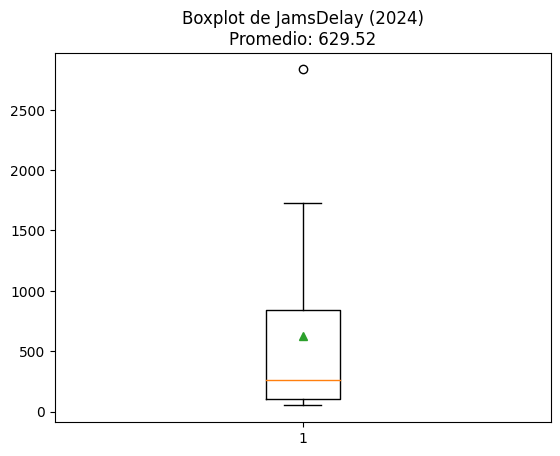

In [ ]:
# Boxplot to analyze the distribution of congestion minutes (JamsDelay)
# Mean calculation
mean_value = merged['jams_delay'].mean()
plt.title(f'Boxplot de JamsDelay (2024)\nPromedio: {mean_value:.2f}')
plt.boxplot(merged['jams_delay'],showmeans=True)
plt.show()


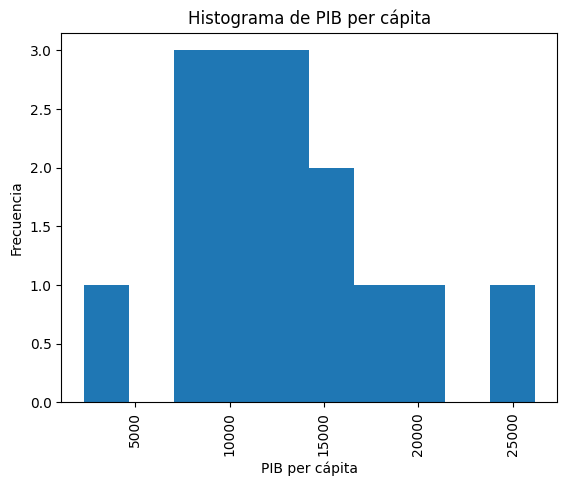

In [ ]:
# Economy distribution (city_gdp_capita) histogram
merged['city_gdp_capita'].plot.hist()
plt.title('Histograma de PIB per cápita')
plt.xlabel('PIB per cápita')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90)
plt.show()


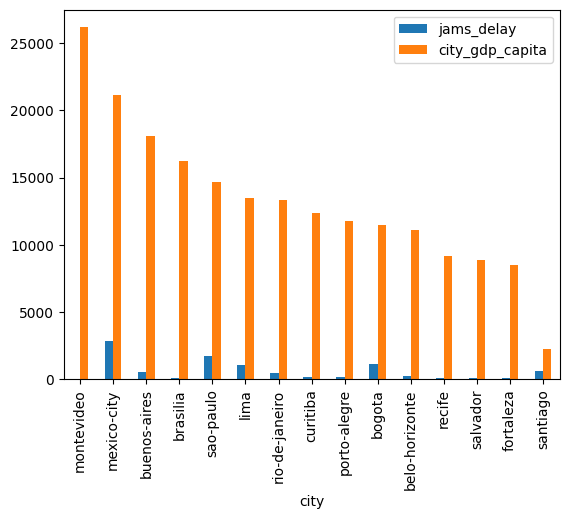

In [ ]:
# Comparative Bar Plot: jams_delay vs. city_gdp_capita by City
merged = merged.sort_values(by='city_gdp_capita', ascending=False)
merged.plot( x='city' , y=['jams_delay', 'city_gdp_capita'],kind='bar')
plt.xticks(rotation=90)
plt.show()

## Step 7: Export & Document Results
In this final stage, we consolidate the work by saving the processed dataset and documenting the project's key findings.

### 7.1 Save final dataset
**Objective:**
Generate a clean, reproducible CSV file containing relevant columns for future analysis or reporting.

**Action:**
* Export the `merged` DataFrame to a file named `ladb_mobility_economy_2024_clean.csv`.
* Use `index=False` to exclude the DataFrame index from the output file.

In [ ]:
# Exporta el dataset final como CSV
merged.to_csv("ladb_mobility_economy_2024_clean.csv", index=False)

# 🧾 Executive Summary

**Context & Objective:**
This analysis explores the correlation between **urban mobility** (specifically congestion delays) and **economic productivity** (GDP per capita). The primary objective was to determine if a city's economic output directly impacts its traffic conditions. We utilized "City" and "Year" as primary keys to filter and integrate two distinct datasets, ensuring a focused analysis on the relationship between wealth and movement.

**Data Coverage:**
The scope of the study includes **15 major cities across Latin America**, strictly focusing on data recorded during the fiscal year **2024**.

**Methodology (High Level):**
The process began with rigorous **data cleaning**, including data type validation, column standardization, and format correction. We then aggregated the mobility data to calculate annual averages per city to reduce noise. Finally, an **INNER JOIN** was executed to integrate traffic and economic tables. This join type was selected to ensure data completeness and integrity, allowing for objective decision-making based only on fully matched records.

**Key Findings:**
The comparative analysis (Bar Chart: *Jams Delay* vs. *GDP per capita*) revealed **no direct linear correlation** between high GDP and increased traffic issues.
* **Montevideo:** Despite having the highest GDP per capita in the sample, it shows minimal traffic delays.
* **Mexico City (CDMX):** As the second-highest GDP city, it exhibits significantly higher *Jams Delay* values.
This discrepancy suggests that economic productivity is not the sole driver of congestion.

**Recommendations:**
To identify the root causes of delays, future analyses should incorporate additional variables such as **unemployment rates** and **population density**. Furthermore, a comparative study of **road infrastructure** is recommended, particularly for high-congestion hubs like Mexico City, to guide targeted investments in urban mobility solutions.
